# Classification
Classification is the task to estimate each item to belong to which class (or group). For example, imagine that we had a dataset of us, containing many physical characteristics, and that our task is to estimate his/her gender. 

Importantly, classification is **supervised leaning**: when modeling, we will use the correct label for checking whether estimations at the training phase are right or wrong. Honestly speaking, not so many data in the world have such *correct label* (or *ground truth label*) for a task, and thus when applying classification to a task, we often need costly human tagging of correct labels. However, because many tasks can be considered to be classification tasks, and because model accuracy is usually much higher than clustering (another grouping task but not using correct labels), classification has been the most investigated area in data mining/machine learning.

## Data
The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. This is a very tiny dataset, but anyway it can be used for an example analysis.

### Typical Library import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's have a look the first a few rows of the data. The data is formatted as CSV, so we can use `pd.read_csv~ to read the file, and let's see the first 10 lines of the data. Each row of the dataset represents one piece of the fruit as represented by several features that are in the table’s columns.

In [2]:
fruits = pd.read_csv('fruit_data_with_colors.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Before proceeding, how many fruit categories does this dataset have?

In [3]:
print(fruits['fruit_name'].unique())

[' apple' ' mandarin' ' orange' ' lemon']


Also, how many data points and how many features (parameters) does this dataset have?

In [4]:
print(fruits.shape)

(59, 7)


### Statistical Summary

It is always good (and indeed necessary) to get a good summary of the data. Descriptive statistical values are useful for this.

In [5]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

### Fruit type distribution

In [6]:
print(fruits.groupby('fruit_name').size())

fruit_name
 apple       19
 lemon       16
 mandarin     5
 orange      19
dtype: int64


So the dataset is pretty balanced except mandarin. We can also visualize this:

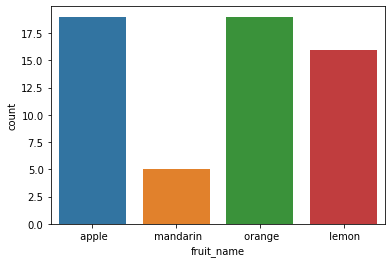

In [7]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

Anyway, we will just continue to use this dataset. For more practical purposes, you have to be careful when you find some imbalanced distributions among categories, because such imbalancedness may cause some troubles for modeling. 

### More visualizations
**Box plot** for each numeric variable will give us a clearer idea of the distribution of the input variables:

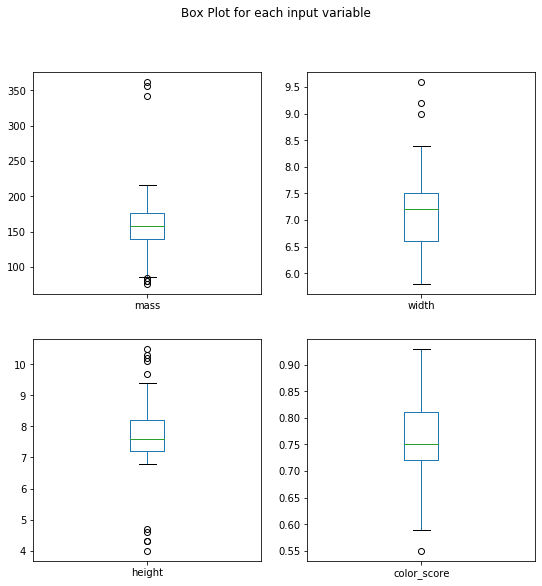

In [8]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

**Histograms** are also often used.  This time, we can visualize histograms according to each feature.

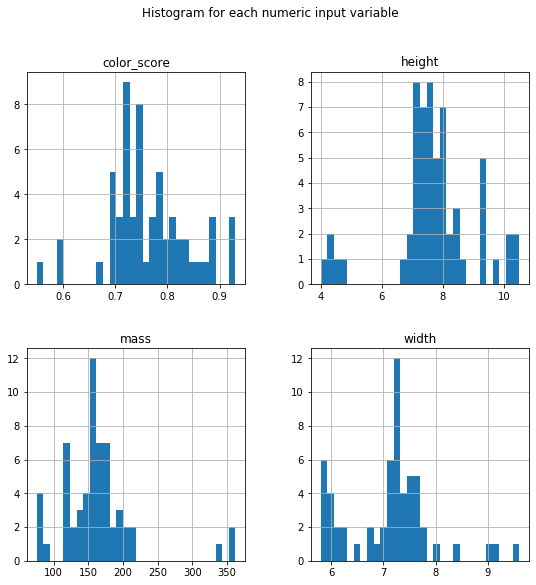

In [9]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

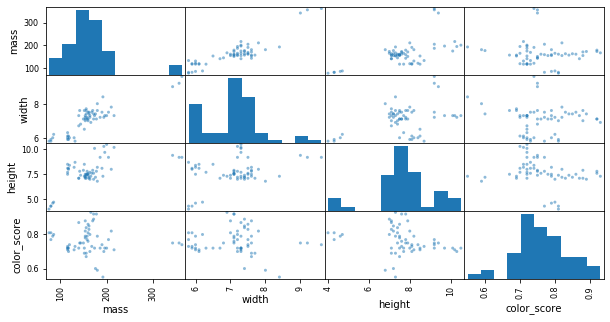

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10, 5))
plt.show()

**Correlation**: Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

In [11]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

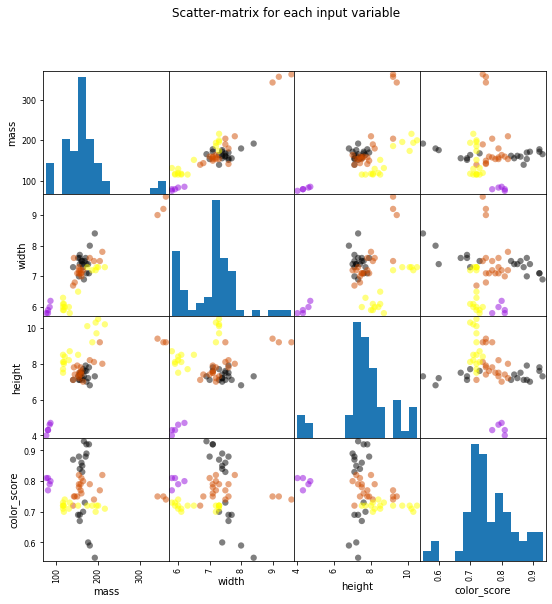

In [12]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

---
## Classification of 4 types of fruit

Now, let's use this dataset to classify apples, mandarins, oranges, and lemons. It means that we're going to build a model to tell what data point is estimated to be classified as one of the 4 fruit categories.

Actually, we already have the answer for this classification in the dataset, and then what is the good meaning to do this? If we have only this dataset, then it's almost useless. However, imagine if we will have another future dataset that contains those features but not the answer category. This is exatly the meaning: we want to estimate for future data, based on our dataset at hand.  When our dataset contains the answer label (*or* ground truth), such model construction is called **supervised learning**.

For this modeling, we have two phases: the training phase and the test phase. So, instead of using the dataset as a whole, divide the dataset for training and test.

### Create training and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Apply scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models

Classification can be conducted by many different algorithms. One very important point is the fact that **there's no best machine learning algorithm for all tasks**. In other words, **It is always important to try several machine learning algorithm to find which one is the best for the dataset.**  So, we try some famous algorithm.

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', multi_class='ovr')
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


### K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Support Vector Machine

In [21]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.61
Accuracy of SVM classifier on test set: 0.33


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of one error made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (However, the test set was small).

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### Plot the decision boundary of the k-nn classifier

In [61]:
%matplotlib inline
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()



C:\Users\hash\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\hash\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


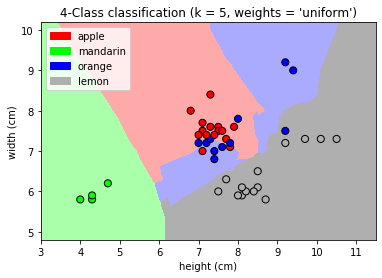

In [62]:
plot_fruit_knn(X_train, y_train, n_neighbors=5, weights='uniform')